In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

import re

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

from src import soporte as sp

In [2]:
df_covid = sp.apertura_exploracion("Covid_clean")

,tweet_id,tweet_url,tweet_content,tweet_type,client,retweets_received,likes_received,tweet_language,user_id,name,screen_name,user_bio,verified_or_non_verified,profile_url,protected_or_non_protected,user_followers,user_following,hashtag,mention,account_creation_year,tweet_posted_hour,tweet_posted_date,tweet_country
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,English,"""1556856595""",Giuseppe Gentile,Giussi92,Unk,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,coronavirus,Unk,2013,15:44:49,2020-02-28,Unk
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,coronavirus,Unk,2010,15:44:40,2020-02-28,Usa
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,Coronavirus,Unk,2008,15:44:39,2020-02-28,Armenia
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,COVID19,Unk,2007,15:44:29,2020-02-28,Norway
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,coronavirus,larry_kudlow,2008,15:44:23,2020-02-28,Andorra


-----

El DataFrame tiene 60160 filas y 23 columnas.
-----

El número de filas duplicadas es 0
-----

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    60160 non-null  object
 1   tweet_url                   60160 non-null  object
 2   tweet_content               60160 non-null  object
 3   tweet_type                  60160 non-null  object
 4   client                      60160 non-null  object
 5   retweets_received           60160 non-null  int64 
 6   likes_received              60160 non-null  int64 
 7   tweet_language              60160 non-null  object
 8   user_id                     60160 non-null  object
 9   name                        60160 non-null  object
 10  screen_name                 60160 non-null  object
 11  user_bio                    6

,count,mean,std,min,25%,50%,75%,max
retweets_received,60160.0,3.142886,106.443453,0.0,0.0,0.0,0.0,23832.0
likes_received,60160.0,5.272590,98.297300,0.0,0.0,0.0,0.0,17526.0
user_followers,60160.0,92749.349900,830970.664927,0.0,145.0,550.0,2449.5,21275160.0
user_following,60160.0,2193.177809,11963.820775,0.0,204.0,562.0,1692.0,1182667.0
account_creation_year,60160.0,2013.744697,3.594467,2006.0,2011.0,2013.0,2017.0,2020.0


-----

Estadísticas objetos:


,count,unique,top,freq
tweet_id,60160,60160,"""1233417783175778304""",1
tweet_url,60160,60160,https://twitter.com/Giussi92/status/1233417783...,1
tweet_content,60160,24943,RT @SaludPublicaEs: El Centro Nacional de Micr...,1943
tweet_type,60160,3,ReTweet,45291
client,60160,315,Twitter for Android,23250
tweet_language,60160,29,English,33174
user_id,60160,43297,"""306127388""",249
name,60160,41541,All Express News,249
screen_name,60160,43297,bitcoinconnect,249
user_bio,60160,35226,Unk,10442


In [3]:
df_covid.columns

Index(['tweet_id', 'tweet_url', 'tweet_content', 'tweet_type', 'client',
       'retweets_received', 'likes_received', 'tweet_language', 'user_id',
       'name', 'screen_name', 'user_bio', 'verified_or_non_verified',
       'profile_url', 'protected_or_non_protected', 'user_followers',
       'user_following', 'hashtag', 'mention', 'account_creation_year',
       'tweet_posted_hour', 'tweet_posted_date', 'tweet_country'],
      dtype='object')

## 6. Análisis

##### -> Establezco una paleta de color para todas las gráficas

In [4]:
custom_palette = "mako"  # Puedes cambiar por "viridis", "rocket", "coolwarm", etc.
sns.set_palette(custom_palette)

# Establecer estilo general para seaborn y matplotlib
sns.set_style("whitegrid")  # Puedes usar "darkgrid", "white", "ticks", etc.
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.edgecolor': 'gray',
    'axes.grid': True,
    'grid.color': 'lightgray'
})

##### -> Analizo correlaciones numéricas

In [5]:
df_corr = df_covid.corr(numeric_only=True)
df_corr

,retweets_received,likes_received,user_followers,user_following,account_creation_year
retweets_received,1.000000,0.904214,0.040819,0.004224,-0.010037
likes_received,0.904214,1.000000,0.086309,0.005087,-0.026102
user_followers,0.040819,0.086309,1.000000,0.022251,-0.108040
user_following,0.004224,0.005087,0.022251,1.000000,-0.076754
account_creation_year,-0.010037,-0.026102,-0.108040,-0.076754,1.000000


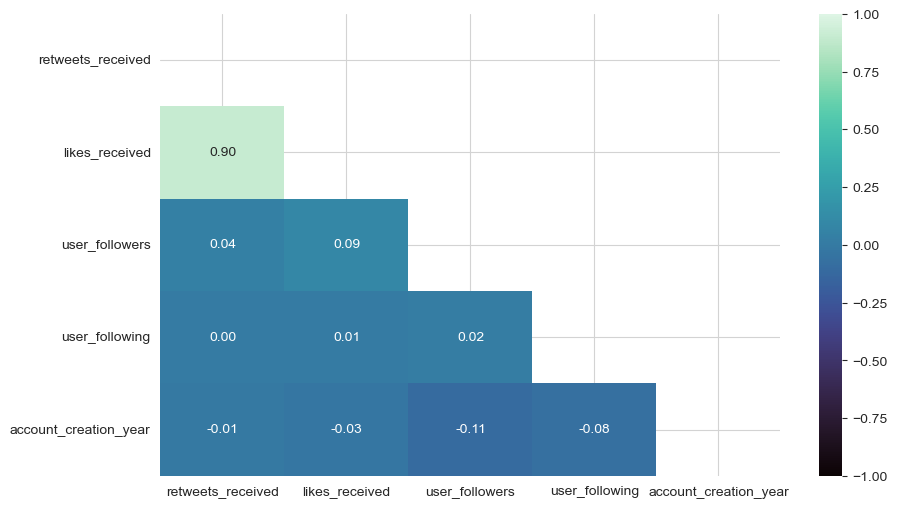

In [6]:
# Crear una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Crear un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);

##### -> Distribución de años de creación de las cuentas

In [7]:
# Ordenar el DataFrame por año (por si acaso)
df_covid_sorted = df_covid.sort_values('account_creation_year')

<Axes: xlabel='account_creation_year', ylabel='Count'>

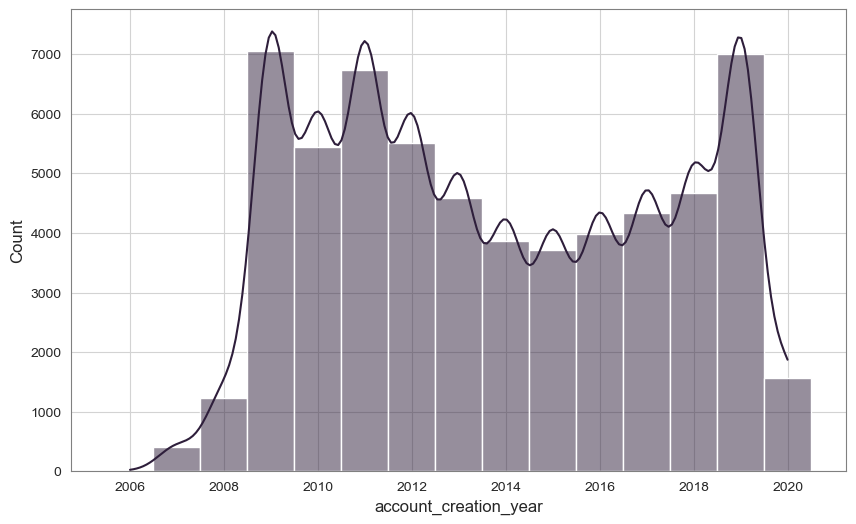

In [8]:
# Histplot con eje y ordenado por año
sns.histplot(x='account_creation_year', data=df_covid_sorted, discrete=True, kde=True)

In [9]:
df_covid_sorted = df_covid.sort_values('account_creation_year')